In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import joblib


In [3]:
df = pd.read_csv("kolhapur.csv")
pd.set_option("display.max_columns", None)
df

,YEAR,MO,DY,HR,T2M,RH2M,PRECTOTCORR,WS50M,WD50M
0,2012,4,1,5,20.25,51.06,0.0,5.07,45.50
1,2012,4,1,6,22.25,39.88,0.0,5.48,55.81
2,2012,4,1,7,26.54,28.25,0.0,4.94,66.52
3,2012,4,1,8,31.62,21.31,0.0,5.39,79.65
4,2012,4,1,9,35.01,18.81,0.0,5.24,88.46
...,...,...,...,...,...,...,...,...,...
87643,2022,4,1,0,22.54,57.12,0.0,5.14,315.62
87644,2022,4,1,1,21.80,55.75,0.0,4.87,323.35
87645,2022,4,1,2,21.19,53.62,0.0,4.78,332.01
87646,2022,4,1,3,20.65,51.25,0.0,4.71,342.83


In [4]:
numerical_feature = [
    feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature = [feature for feature in numerical_feature if len(
    df[feature].unique()) < 32]
continuous_feature = [
    feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [
    feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))


Numerical Features Count 9
Discrete feature Count 4
Continuous feature Count 5
Categorical feature Count 0


In [5]:
# Handle Missing Values
df.isnull().sum()*100/len(df)


YEAR           0.0
MO             0.0
DY             0.0
HR             0.0
T2M            0.0
RH2M           0.0
PRECTOTCORR    0.0
WS50M          0.0
WD50M          0.0
dtype: float64

In [6]:
print(numerical_feature)


['YEAR', 'MO', 'DY', 'HR', 'T2M', 'RH2M', 'PRECTOTCORR', 'WS50M', 'WD50M']


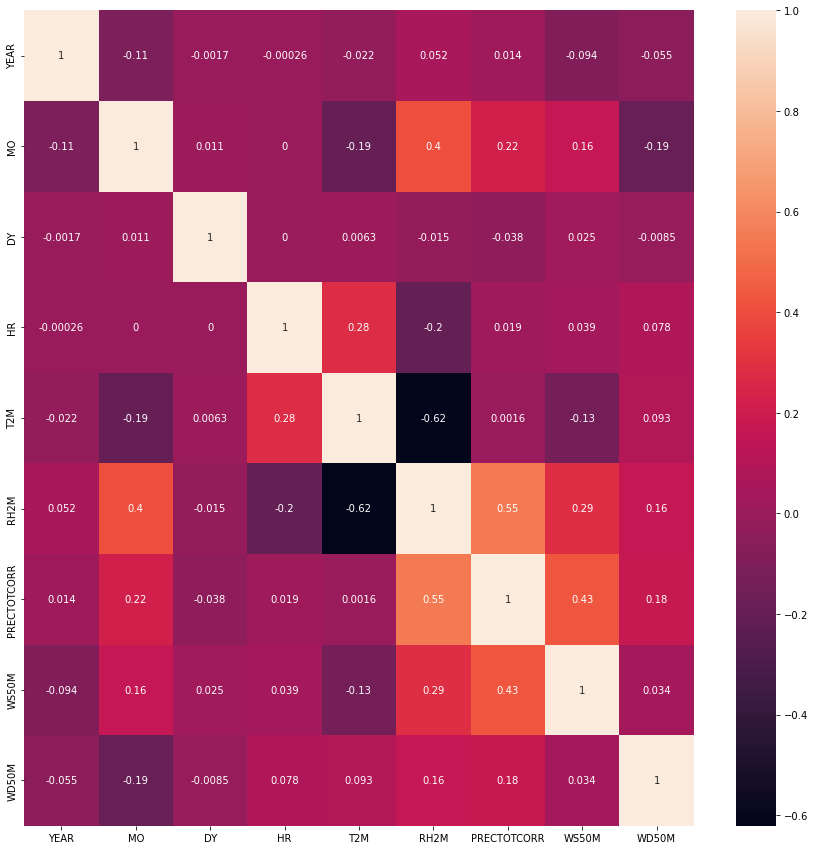

In [7]:
corrmat = df.corr(method = "spearman")
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [10]:
data=df.copy()

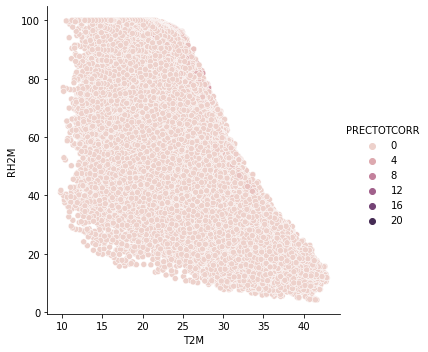

In [11]:
sns.relplot(x='T2M', y='RH2M', hue='PRECTOTCORR', data=data)
#QV :Humedity


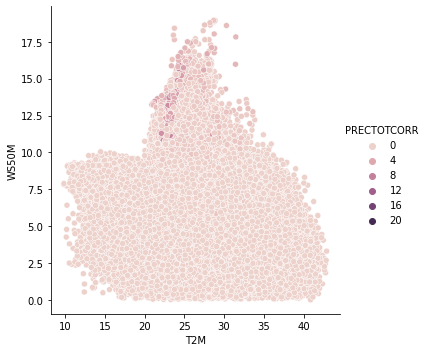

In [12]:
sns.relplot(x='T2M',y='WS50M',hue='PRECTOTCORR',data=data)

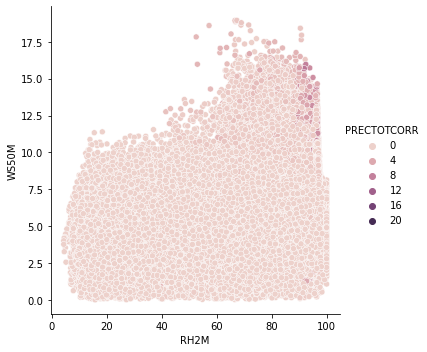

In [14]:
sns.relplot(x='RH2M',y='WS50M',hue='PRECTOTCORR',data=data)

c:\Users\ajaym\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


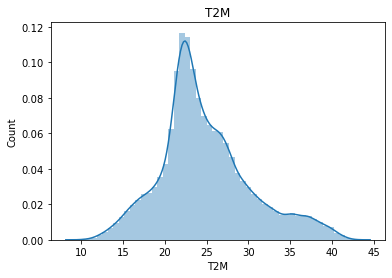

<Figure size 1080x1080 with 0 Axes>

c:\Users\ajaym\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


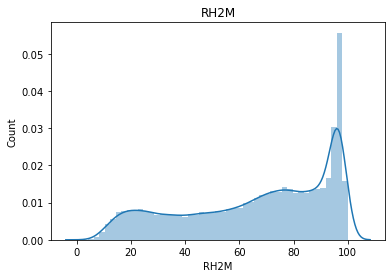

<Figure size 1080x1080 with 0 Axes>

c:\Users\ajaym\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


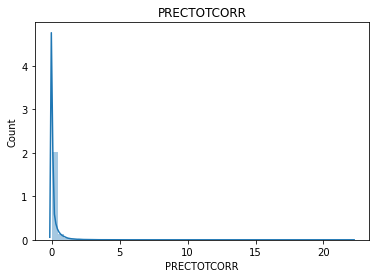

<Figure size 1080x1080 with 0 Axes>

c:\Users\ajaym\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


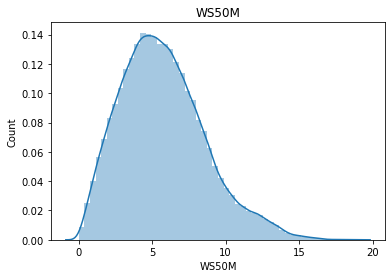

<Figure size 1080x1080 with 0 Axes>

c:\Users\ajaym\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


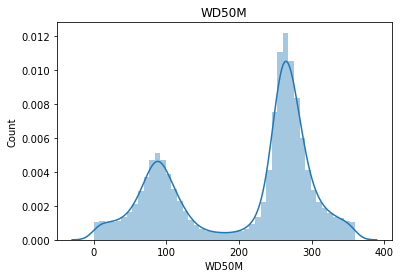

<Figure size 1080x1080 with 0 Axes>

In [15]:
for feature in continuous_feature:
    data = df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15, 15))
    plt.show()


c:\Users\ajaym\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ajaym\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ajaym\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ajaym\anaconda\lib\site-p

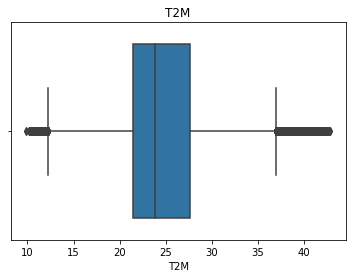

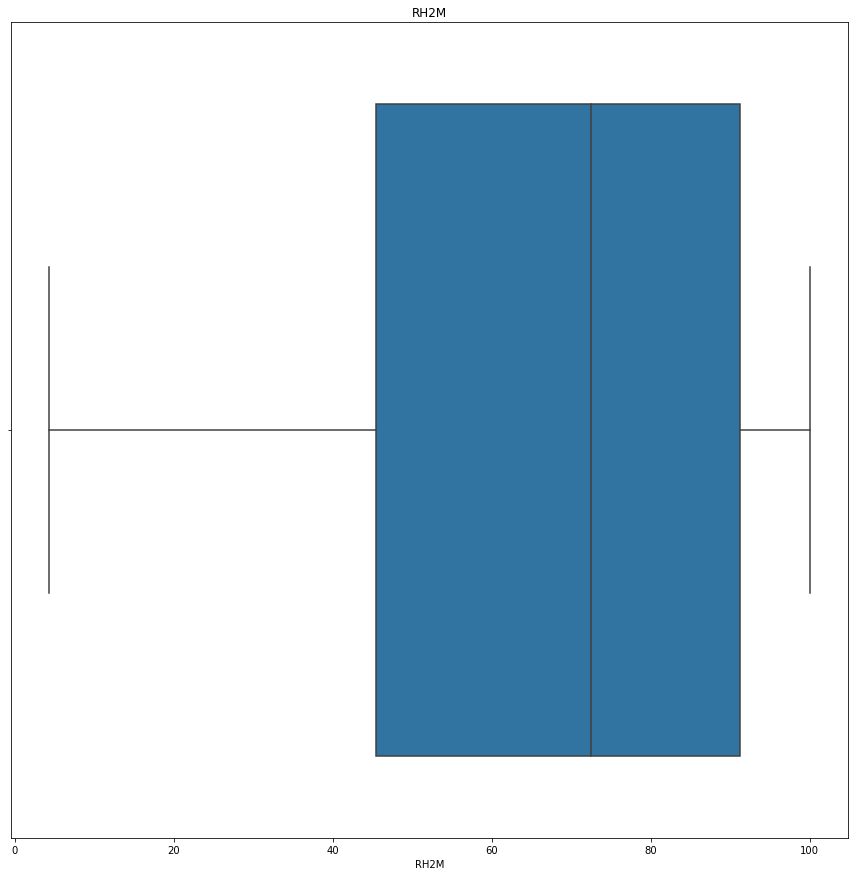

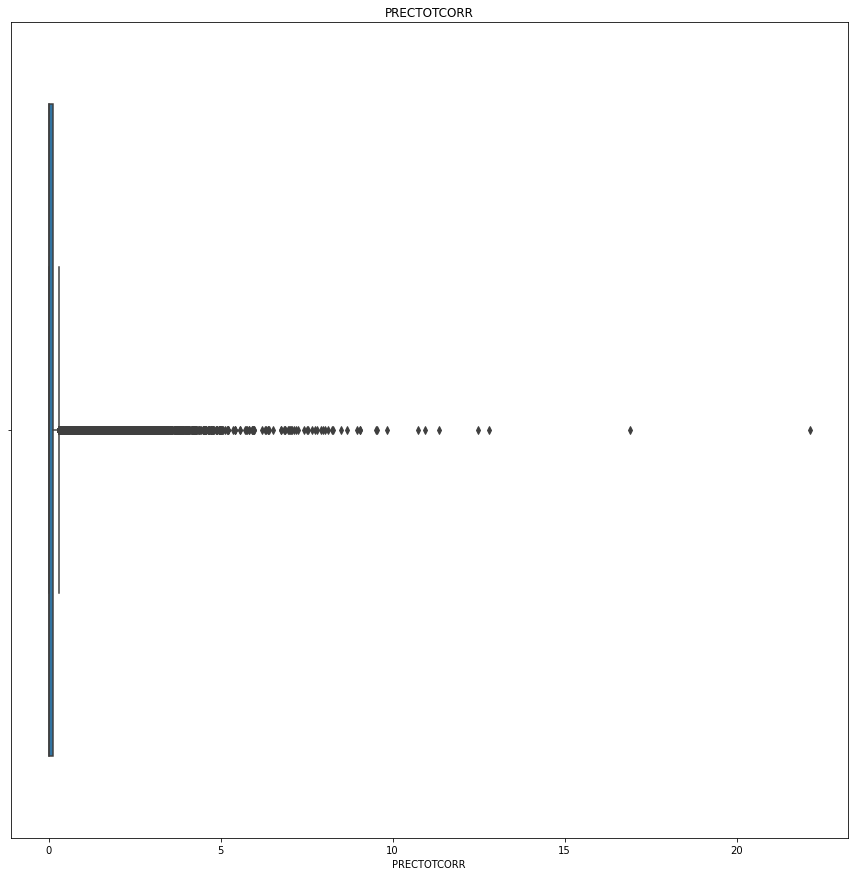

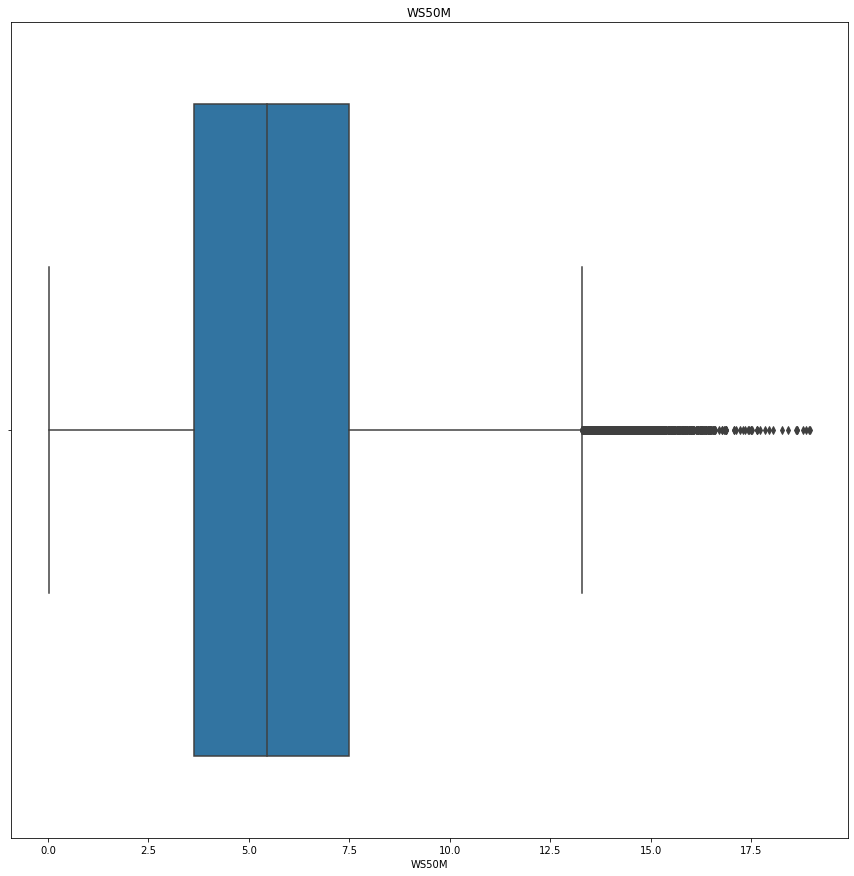

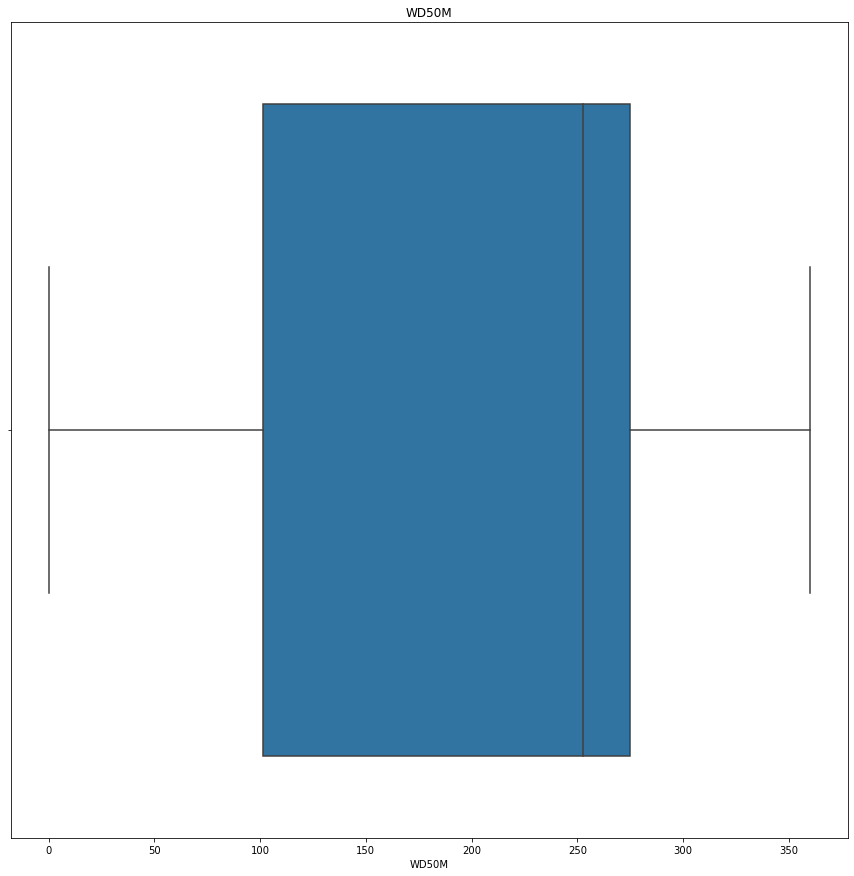

<Figure size 1080x1080 with 0 Axes>

In [55]:
#A for loop is used to plot a boxplot for all the continuous features to see the outliers
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [16]:
d=df.copy()

In [17]:
print(d["T2M"].unique())
print(type(df["T2M"].unique()))
print(d["PRECTOTCORR"].unique())
print(type(df["PRECTOTCORR"].unique()))
print(d["WS50M"].unique())
print(type(d["WS50M"].unique()))


[20.25 22.25 26.54 ... 10.55 10.15 10.2 ]
<class 'numpy.ndarray'>
[0.000e+00 1.000e-02 3.000e-02 4.000e-02 5.000e-02 6.000e-02 8.000e-02
 1.000e-01 1.100e-01 2.000e-01 1.300e-01 1.200e-01 2.000e-02 2.100e-01
 3.700e-01 3.600e-01 1.700e-01 7.000e-02 4.100e-01 1.500e-01 3.300e-01
 5.600e-01 5.300e-01 6.600e-01 1.080e+00 7.800e-01 1.400e-01 1.900e-01
 2.200e-01 9.000e-02 2.700e-01 2.900e-01 2.300e-01 6.400e-01 7.400e-01
 6.700e-01 3.200e-01 2.800e-01 1.800e-01 4.800e-01 4.700e-01 5.400e-01
 5.900e-01 5.800e-01 4.600e-01 2.400e-01 1.600e-01 3.400e-01 4.900e-01
 8.900e-01 8.800e-01 4.300e-01 3.100e-01 3.800e-01 5.200e-01 5.500e-01
 4.500e-01 4.200e-01 5.000e-01 6.100e-01 3.500e-01 2.500e-01 1.040e+00
 6.800e-01 6.300e-01 2.600e-01 3.900e-01 4.000e-01 1.290e+00 1.940e+00
 2.590e+00 3.130e+00 3.220e+00 2.950e+00 2.530e+00 2.400e+00 2.210e+00
 2.180e+00 2.330e+00 2.090e+00 1.880e+00 1.480e+00 1.160e+00 9.100e-01
 6.500e-01 1.450e+00 1.460e+00 1.260e+00 9.200e-01 1.170e+00 1.390e+00
 1.570e+00 

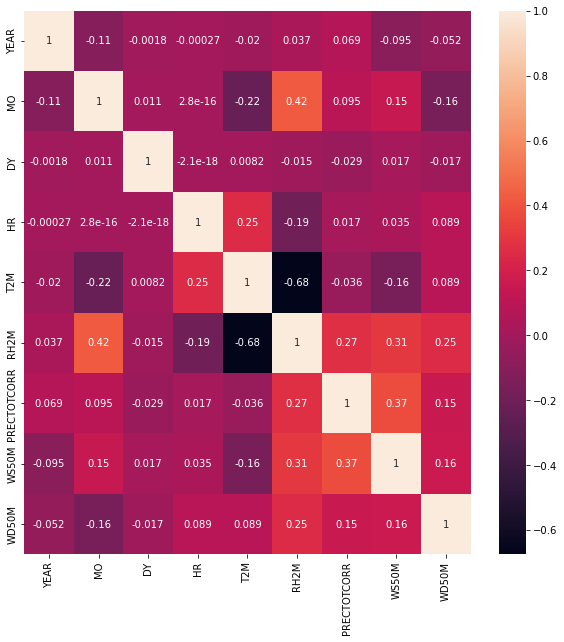

In [18]:
corrmat = d.corr()
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [19]:
def qq_plots(d, variable):
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()


T2M


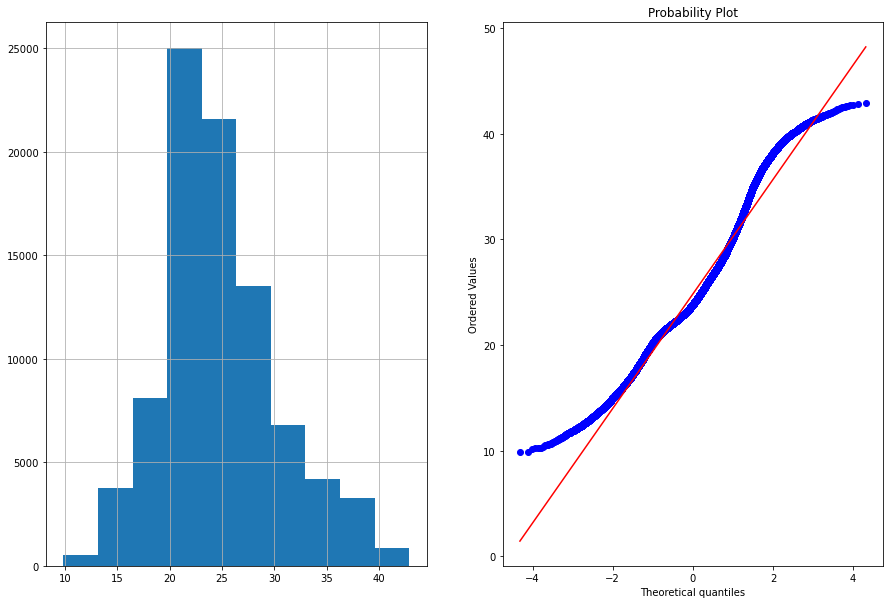

RH2M


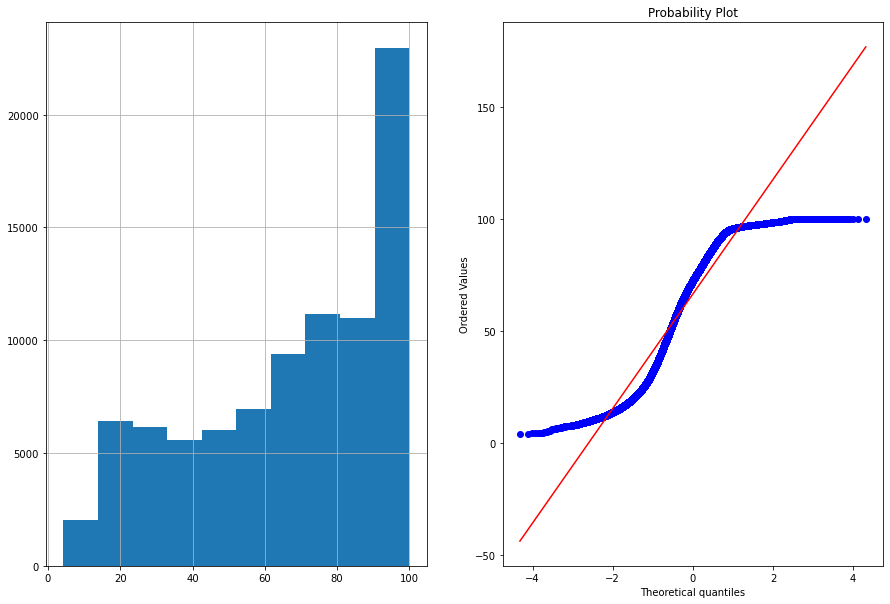

PRECTOTCORR


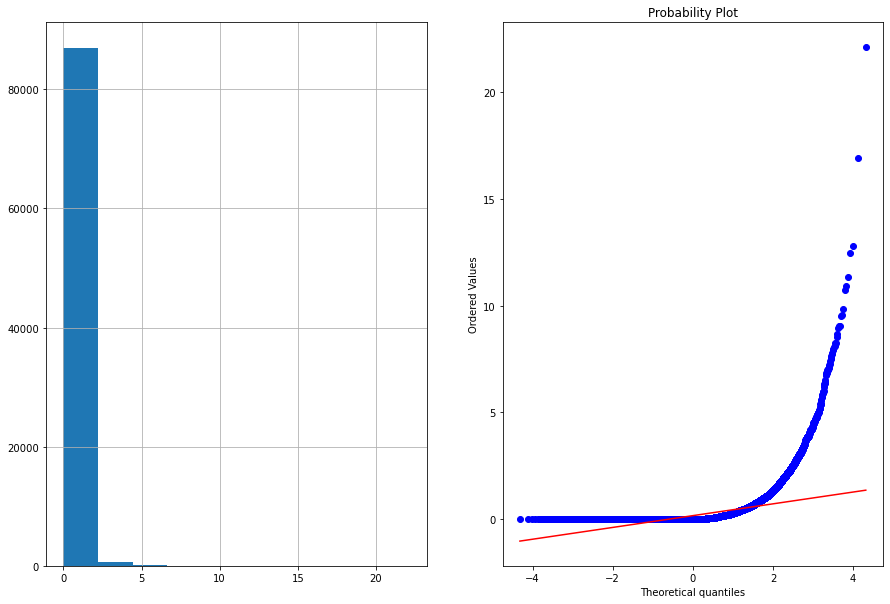

WS50M


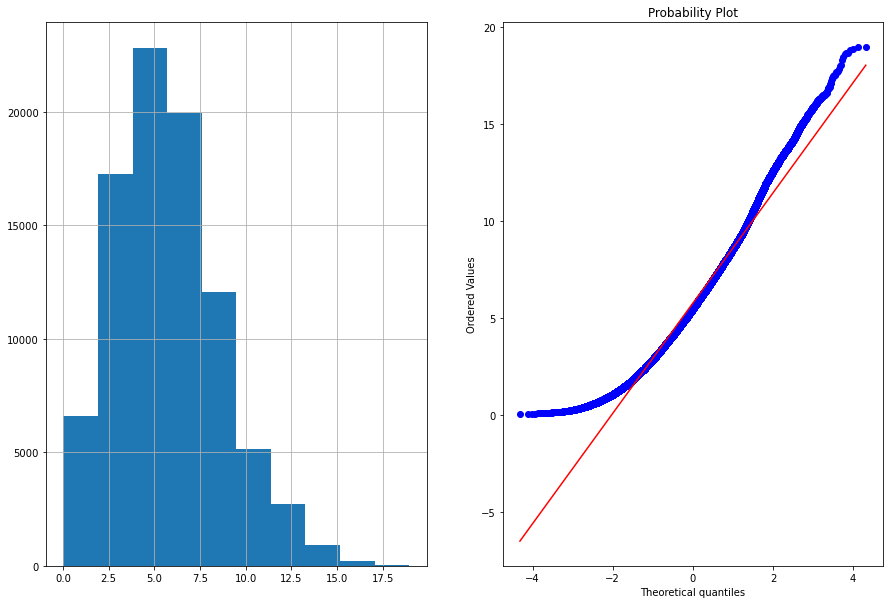

WD50M


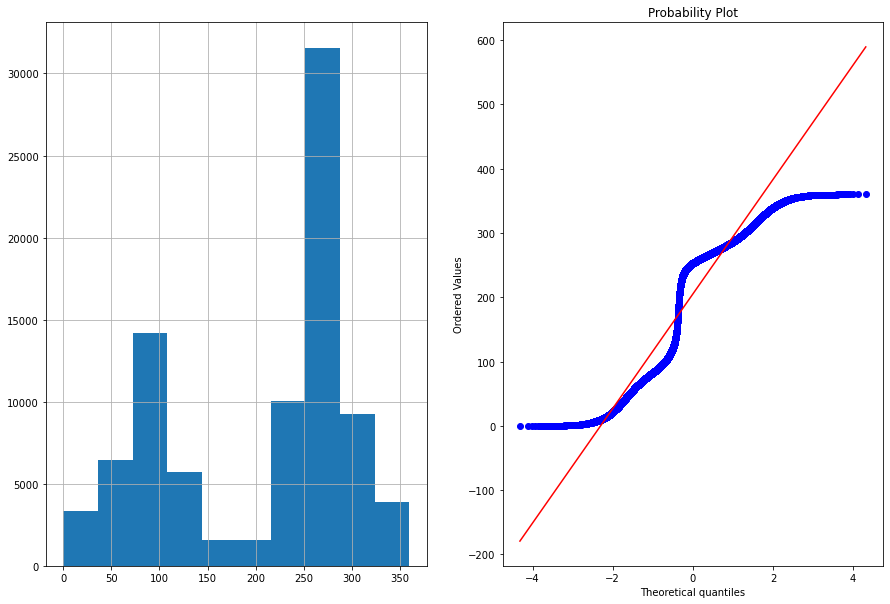

In [20]:
for feature in continuous_feature:
    print(feature)
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show()


In [21]:
d.PRECTOTCORR.unique()


array([0.000e+00, 1.000e-02, 3.000e-02, 4.000e-02, 5.000e-02, 6.000e-02,
       8.000e-02, 1.000e-01, 1.100e-01, 2.000e-01, 1.300e-01, 1.200e-01,
       2.000e-02, 2.100e-01, 3.700e-01, 3.600e-01, 1.700e-01, 7.000e-02,
       4.100e-01, 1.500e-01, 3.300e-01, 5.600e-01, 5.300e-01, 6.600e-01,
       1.080e+00, 7.800e-01, 1.400e-01, 1.900e-01, 2.200e-01, 9.000e-02,
       2.700e-01, 2.900e-01, 2.300e-01, 6.400e-01, 7.400e-01, 6.700e-01,
       3.200e-01, 2.800e-01, 1.800e-01, 4.800e-01, 4.700e-01, 5.400e-01,
       5.900e-01, 5.800e-01, 4.600e-01, 2.400e-01, 1.600e-01, 3.400e-01,
       4.900e-01, 8.900e-01, 8.800e-01, 4.300e-01, 3.100e-01, 3.800e-01,
       5.200e-01, 5.500e-01, 4.500e-01, 4.200e-01, 5.000e-01, 6.100e-01,
       3.500e-01, 2.500e-01, 1.040e+00, 6.800e-01, 6.300e-01, 2.600e-01,
       3.900e-01, 4.000e-01, 1.290e+00, 1.940e+00, 2.590e+00, 3.130e+00,
       3.220e+00, 2.950e+00, 2.530e+00, 2.400e+00, 2.210e+00, 2.180e+00,
       2.330e+00, 2.090e+00, 1.880e+00, 1.480e+00, 

In [22]:
d1=d.copy()

In [23]:

d1=d1.PRECTOTCORR.map({0:1})

In [24]:
d2=d1.replace(np.nan, 0)

In [25]:
d2.unique()


array([1., 0.])

In [26]:
d3=d['T2M']

In [27]:
d4 = pd.concat([d3, d2], axis=1, join='inner')
display(d4)


,T2M,PRECTOTCORR
0,20.25,1.0
1,22.25,1.0
2,26.54,1.0
3,31.62,1.0
4,35.01,1.0
...,...,...
87643,22.54,1.0
87644,21.80,1.0
87645,21.19,1.0
87646,20.65,1.0


In [28]:
d5=d['HR']

In [29]:
d6 = pd.concat([d4, d5], axis=1, join='inner')
display(d6)


,T2M,PRECTOTCORR,HR
0,20.25,1.0,5
1,22.25,1.0,6
2,26.54,1.0,7
3,31.62,1.0,8
4,35.01,1.0,9
...,...,...,...
87643,22.54,1.0,0
87644,21.80,1.0,1
87645,21.19,1.0,2
87646,20.65,1.0,3


In [30]:
d7=d['DY']

In [31]:
d8=d['MO']

In [32]:
d9=d['YEAR']

In [33]:
d10 = pd.concat([d6, d7], axis=1, join='inner')
display(d10)


,T2M,PRECTOTCORR,HR,DY
0,20.25,1.0,5,1
1,22.25,1.0,6,1
2,26.54,1.0,7,1
3,31.62,1.0,8,1
4,35.01,1.0,9,1
...,...,...,...,...
87643,22.54,1.0,0,1
87644,21.80,1.0,1,1
87645,21.19,1.0,2,1
87646,20.65,1.0,3,1


In [34]:
d11 = pd.concat([d10, d8], axis=1, join='inner')
display(d11)


,T2M,PRECTOTCORR,HR,DY,MO
0,20.25,1.0,5,1,4
1,22.25,1.0,6,1,4
2,26.54,1.0,7,1,4
3,31.62,1.0,8,1,4
4,35.01,1.0,9,1,4
...,...,...,...,...,...
87643,22.54,1.0,0,1,4
87644,21.80,1.0,1,1,4
87645,21.19,1.0,2,1,4
87646,20.65,1.0,3,1,4


In [35]:
d12 = pd.concat([d11, d9], axis=1, join='inner')
display(d12)


,T2M,PRECTOTCORR,HR,DY,MO,YEAR
0,20.25,1.0,5,1,4,2012
1,22.25,1.0,6,1,4,2012
2,26.54,1.0,7,1,4,2012
3,31.62,1.0,8,1,4,2012
4,35.01,1.0,9,1,4,2012
...,...,...,...,...,...,...
87643,22.54,1.0,0,1,4,2022
87644,21.80,1.0,1,1,4,2022
87645,21.19,1.0,2,1,4,2022
87646,20.65,1.0,3,1,4,2022


In [39]:
d12

,T2M,PRECTOTCORR,HR,DY,MO,YEAR
0,20.25,1.0,5,1,4,2012
1,22.25,1.0,6,1,4,2012
2,26.54,1.0,7,1,4,2012
3,31.62,1.0,8,1,4,2012
4,35.01,1.0,9,1,4,2012
...,...,...,...,...,...,...
87643,22.54,1.0,0,1,4,2022
87644,21.80,1.0,1,1,4,2022
87645,21.19,1.0,2,1,4,2022
87646,20.65,1.0,3,1,4,2022


In [41]:
d12['PRECTOTCORR'].unique()

array([1., 0.])

In [43]:
d13=d['RH2M'].copy()

In [45]:
d14=d['WS50M'].copy()

In [47]:
d15 = pd.concat([d12, d13], axis=1, join='inner')
display(d15)

,T2M,PRECTOTCORR,HR,DY,MO,YEAR,RH2M
0,20.25,1.0,5,1,4,2012,51.06
1,22.25,1.0,6,1,4,2012,39.88
2,26.54,1.0,7,1,4,2012,28.25
3,31.62,1.0,8,1,4,2012,21.31
4,35.01,1.0,9,1,4,2012,18.81
...,...,...,...,...,...,...,...
87643,22.54,1.0,0,1,4,2022,57.12
87644,21.80,1.0,1,1,4,2022,55.75
87645,21.19,1.0,2,1,4,2022,53.62
87646,20.65,1.0,3,1,4,2022,51.25


In [50]:
d16 = pd.concat([d15, d14], axis=1, join='inner')
display(d16)

,T2M,PRECTOTCORR,HR,DY,MO,YEAR,RH2M,WS50M
0,20.25,1.0,5,1,4,2012,51.06,5.07
1,22.25,1.0,6,1,4,2012,39.88,5.48
2,26.54,1.0,7,1,4,2012,28.25,4.94
3,31.62,1.0,8,1,4,2012,21.31,5.39
4,35.01,1.0,9,1,4,2012,18.81,5.24
...,...,...,...,...,...,...,...,...
87643,22.54,1.0,0,1,4,2022,57.12,5.14
87644,21.80,1.0,1,1,4,2022,55.75,4.87
87645,21.19,1.0,2,1,4,2022,53.62,4.78
87646,20.65,1.0,3,1,4,2022,51.25,4.71


In [51]:
d17=d['WD50M'].copy()

In [53]:
d18 = pd.concat([d16, d17], axis=1, join='inner')
display(d18)

,T2M,PRECTOTCORR,HR,DY,MO,YEAR,RH2M,WS50M,WD50M
0,20.25,1.0,5,1,4,2012,51.06,5.07,45.50
1,22.25,1.0,6,1,4,2012,39.88,5.48,55.81
2,26.54,1.0,7,1,4,2012,28.25,4.94,66.52
3,31.62,1.0,8,1,4,2012,21.31,5.39,79.65
4,35.01,1.0,9,1,4,2012,18.81,5.24,88.46
...,...,...,...,...,...,...,...,...,...
87643,22.54,1.0,0,1,4,2022,57.12,5.14,315.62
87644,21.80,1.0,1,1,4,2022,55.75,4.87,323.35
87645,21.19,1.0,2,1,4,2022,53.62,4.78,332.01
87646,20.65,1.0,3,1,4,2022,51.25,4.71,342.83


c:\Users\ajaym\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PRECTOTCORR', ylabel='count'>

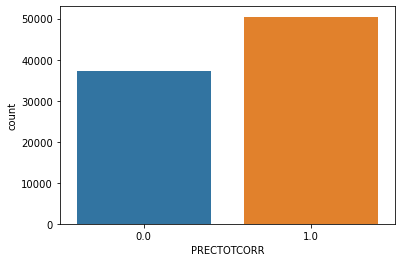

In [57]:
sns.countplot(d18["PRECTOTCORR"])

In [54]:
d18.to_csv("pKolhapur.csv")
